<a href="https://colab.research.google.com/github/vaissss-sh/Titanic-Dataset-Cleaning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data=pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
women=train_data.loc[train_data.Sex=='female']['Survived']
rate=(sum(women)/len(women))*100
print("% of women who survived:",rate)

% of women who survived: 74.20382165605095


In [7]:
men=train_data.loc[train_data.Sex=='male']['Survived']
rate=(sum(men)/len(men))*100
print("% of men who survived:",rate)

% of men who survived: 18.890814558058924


In [8]:
print("\n--- Missing Values in Training Data ---")
print(train_data.isnull().sum())

print("\n--- Missing Values in Test Data ---")
print(test_data.isnull().sum())


--- Missing Values in Training Data ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

--- Missing Values in Test Data ---
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
print("\n--- Description of Values in Training Data ---")
print(train_data.describe())

print("\n--- Description of Values in Test Data ---")
print(test_data.describe())


--- Description of Values in Training Data ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

--- Description of Values in Tes

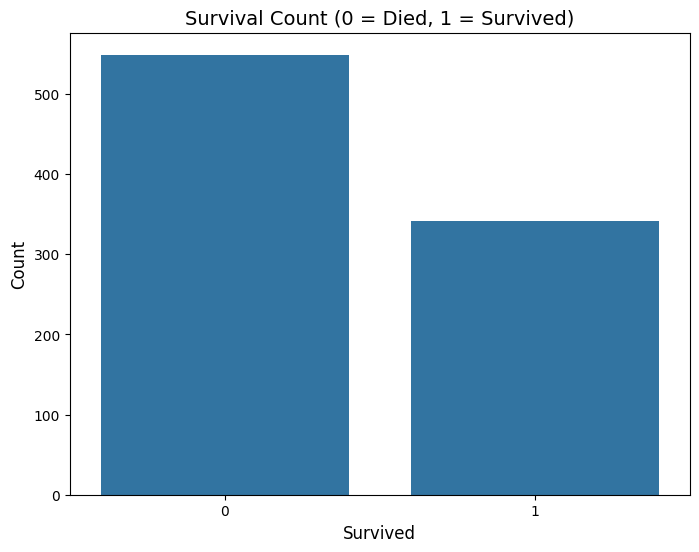

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count (0 = Died, 1 = Survived)', fontsize=14)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

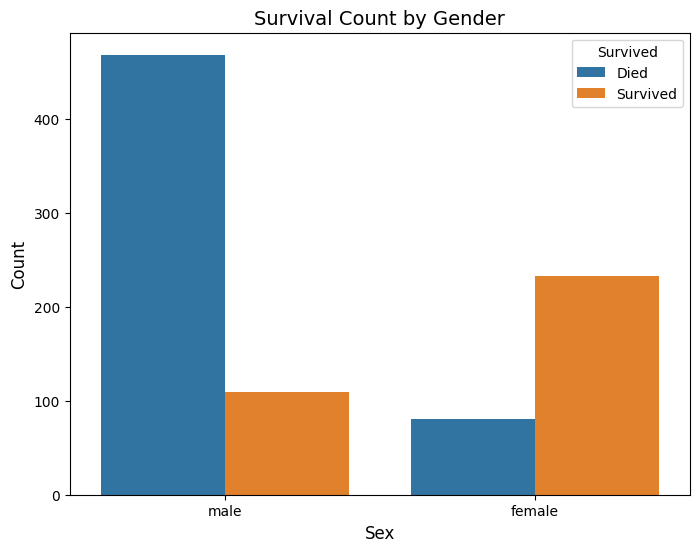

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival Count by Gender', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()

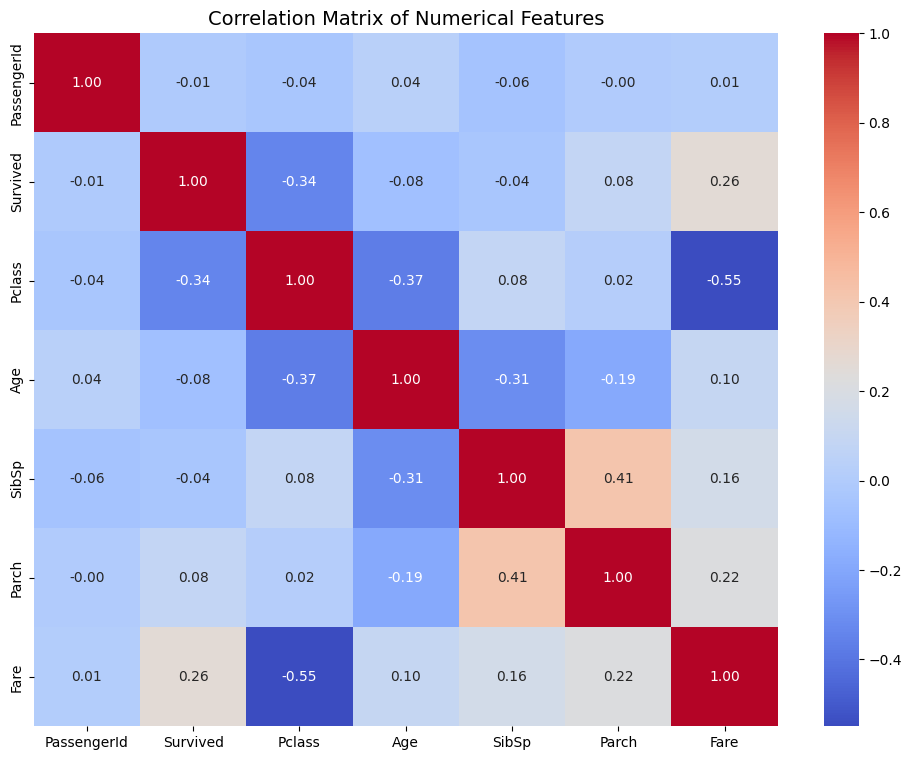

In [33]:
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train_data[numeric_cols].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.show()

In [10]:
train_clean = train_data.copy()
test_clean = test_data.copy()

In [11]:
train_clean['FamilySize'] = train_clean['SibSp'] + train_clean['Parch'] + 1
train_clean['IsAlone'] = 0
train_clean.loc[train_clean['FamilySize'] == 1, 'IsAlone'] = 1

test_clean['FamilySize'] = test_clean['SibSp'] + test_clean['Parch'] + 1
test_clean['IsAlone'] = 0
test_clean.loc[test_clean['FamilySize'] == 1, 'IsAlone'] = 1

In [12]:
median_age = train_clean['Age'].median()
train_clean['Age'].fillna(median_age, inplace=True)
test_clean['Age'].fillna(median_age, inplace=True)

/tmp/ipython-input-1008037789.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_clean['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-1008037789.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [13]:
mode_embarked = train_clean['Embarked'].mode()[0]
train_clean['Embarked'].fillna(mode_embarked, inplace=True)

/tmp/ipython-input-3948530293.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_clean['Embarked'].fillna(mode_embarked, inplace=True)


In [14]:
median_fare = train_clean['Fare'].median()
test_clean['Fare'].fillna(median_fare, inplace=True)

/tmp/ipython-input-2939414664.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_clean['Fare'].fillna(median_fare, inplace=True)


In [15]:
train_clean.drop('Cabin', axis=1, inplace=True)
test_clean.drop('Cabin', axis=1, inplace=True)


In [16]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  FamilySize   891 non-null    int64  
 12  IsAlone      891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [17]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  FamilySize   418 non-null    int64  
 11  IsAlone      418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


In [18]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_clean['Sex'] = ordinal_encoder.fit_transform(train_clean[['Sex']])
test_clean['Sex'] = ordinal_encoder.transform(test_clean[['Sex']])

In [19]:
train_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,S,1,1


In [20]:
train_clean=pd.get_dummies(train_clean,columns=['Embarked'],drop_first=True)
test_clean=pd.get_dummies(test_clean,columns=['Embarked'],drop_first=True)

In [21]:
train_clean.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.25,2,0,False,True


In [22]:
test_passenger_ids = test_clean['PassengerId']
train_clean.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
test_clean.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [23]:
print("\n--- Cleaned Training Data Head ---")
print(train_clean.head())


--- Cleaned Training Data Head ---
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  IsAlone  \
0         0       3  1.0  22.0      1      0   7.2500           2        0   
1         1       1  0.0  38.0      1      0  71.2833           2        0   
2         1       3  0.0  26.0      0      0   7.9250           1        1   
3         1       1  0.0  35.0      1      0  53.1000           2        0   
4         0       3  1.0  35.0      0      0   8.0500           1        1   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

X = train_clean.drop('Survived', axis=1)
y = train_clean['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("--- Evaluating Models using 5-Fold Cross-Validation ---")

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f} (Std: {scores.std():.4f})")

--- Evaluating Models using 5-Fold Cross-Validation ---
Logistic Regression: Mean Accuracy = 0.7924 (Std: 0.0215)
Random Forest: Mean Accuracy = 0.8115 (Std: 0.0344)
Gradient Boosting: Mean Accuracy = 0.8260 (Std: 0.0245)


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

print("\n--- Tuning Hyperparameters for Gradient Boosting ---")

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X, y)

print(f"Best Parameters Found: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")


--- Tuning Hyperparameters for Gradient Boosting ---
Best Parameters Found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8362


In [27]:

print("\n--- Creating Final Submission File ---")
final_model = grid_search.best_estimator_
X_test = test_clean
test_ids = test_passenger_ids
test_predictions = final_model.predict(X_test)

submission = pd.DataFrame({
    "PassengerId": test_ids,
    "Survived": test_predictions
})

submission.to_csv('titanic_submission.csv', index=False)

print("File 'titanic_submission.csv' created successfully.")
print(submission.head())


--- Creating Final Submission File ---
File 'titanic_submission.csv' created successfully.
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
